<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

- when there are 2 or more measurable parameters
- one of which is time to denote a rate of change of said parameters

### 1.3 Calculus: Meaning and Notation

- introduce constant (eg r) to indicate rate of a variable
- constants can also indicate changes in the initial starting point of different data sets 
- typically a count or volume variable that is dependent on the parameter time(t)
- we want to find rate of change of a variable with respect to time 

### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

- can aproximate the rate of change wrt time sign into a simple fraction
- as time step decreases the approximation becomes better 

### 1.5 Solving Differential Equations

- differential equations are to find a mathematical function that satisfies it 
- analytical or numerical 
- typically best way to solve is Euler method

### 1.6 The Euler Method

- approxiate differential equation with a fraction
- list out an sequence of values using a simplified fraction or equation that relates the variables
- the more points within the sequence the better
- the smaller the time step the more accurate 
- always adopt euler

### 1.7 Using Euler for the logistic equation

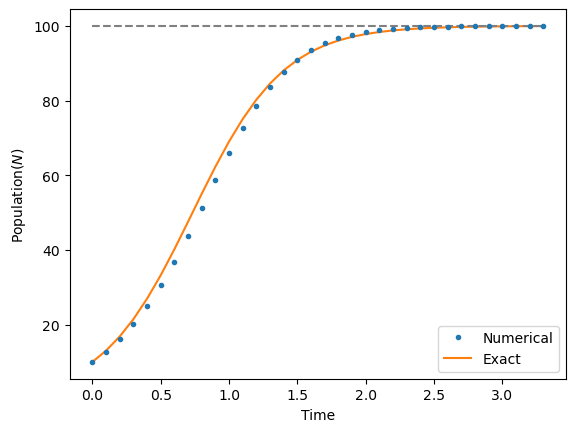

In [1]:
import math
import numpy as np 
from matplotlib import pyplot as plt

def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 1.8 Some things to note about the code

- a dictionary was used to hold both time and population data
- use of while true loop as well as the need for break to run the code
- always set a threshold or limit beyond which the flow of the code is broken
- np.abs() allows me not ignore any negative values and math.modulus the values 
- for each list or array of numbers (n) i will need to wait for the code to run n number of times BUT to avoid this you can use TRY_EXCEPT

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

- Predator-Prey model via  Lotka-Volterra equations.
- r
 to represent the rabbits (the prey) and 
f
 foxes (the predators). 
- α
,
β
,
δ
,
γ
 are constants
 - my intepretation of the equations: rate of change of rabbits = k*initial value of rabbits - k' *rabbits*foxes, where k and k' are arbitary constants
 - for foxes, rate of change of foxes = j*rabbits*foxes - j'*foxes , where j and j' are arbitrary constants

### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

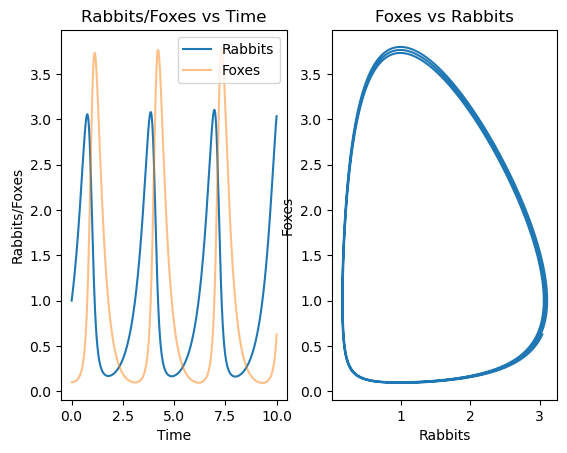

In [2]:
import math
import numpy as np 
from matplotlib import pyplot as plt

max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

### 2.3 Some things to note about the code

- put things in functions so more focus is placed on the loop 
- introduce new variables to carry old variables temporarily when computing
- use command 'data' to collect data before splitting into dictionary later on >> allows for readability

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [5]:
import scipy

from scipy.integrate import odeint

### 3.2 Radioactivity

In [7]:
import math
import numpy as np 
from matplotlib import pyplot as plt

max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )

# all_N

array([[1.00000000e+00],
       [8.67621276e-01],
       [7.52766640e-01],
       [6.53116372e-01],
       [5.66657639e-01],
       [4.91644215e-01],
       [4.26560974e-01],
       [3.70093381e-01],
       [3.21100869e-01],
       [2.78593933e-01],
       [2.41714017e-01],
       [2.09716218e-01],
       [1.81954247e-01],
       [1.57867367e-01],
       [1.36969081e-01],
       [1.18837283e-01],
       [1.03105750e-01],
       [8.94567389e-02],
       [7.76145665e-02],
       [6.73400462e-02],
       [5.84256537e-02],
       [5.06913374e-02],
       [4.39808873e-02],
       [3.81587555e-02],
       [3.31073474e-02],
       [2.87246384e-02],
       [2.49221074e-02],
       [2.16229498e-02],
       [1.87605311e-02],
       [1.62770358e-02],
       [1.41223025e-02],
       [1.22528102e-02],
       [1.06307987e-02],
       [9.22350707e-03],
       [8.00251093e-03],
       [6.94314874e-03],
       [6.02402349e-03],
       [5.22657092e-03],
       [4.53468413e-03],
       [3.93438839e-03],


### 3.3 Logistic Equation

In [8]:
import math
import numpy as np 
from matplotlib import pyplot as plt

def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))


### 3.4 Predator-Prey

In [10]:
import math
import numpy as np 
from matplotlib import pyplot as plt

max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

## Exercise 1 :  The Lorentz Attaractor

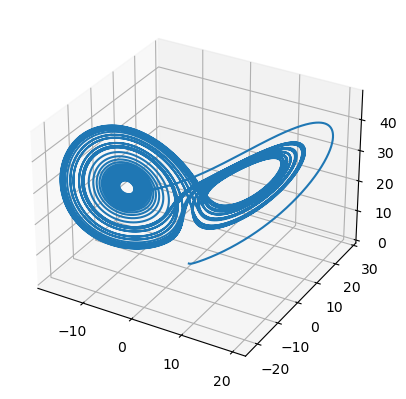

In [17]:
max_time = 50
dt = 0.0001
x,y,z = 0,1,0

# Lotka-Volterra equations
def dxyz_dt(xyz,t):
    '''
    Function for the derivative.
    - xyz contains all the variables for the simulation 
    - t is the dependant variable
    '''

    x,y,z = xyz

    #values of constants
    p=10
    r=8/3
    q=28
    
    #x equation 
    dx_dt = p*(y-x)
    
    #y equation
    dy_dt = (x*(q-z)-y)
    
    #z equation
    dz_dt = (x*y-r*z)

    return [dx_dt, dy_dt, dz_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)


results = odeint(y0=[x,y,z],          # Dependant variable
                 func=dxyz_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results 
data["x"] = results[:, 0]
data["y"] = results[:, 1]
data["z"] = results[:, 2]

ax = plt.axes(projection='3d')
ax.plot3D(data["x"], data["y"], data["z"])
plt.show()